In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
#Importar data sets 
cash_request0 = pd.read_csv('./project_dataset/extract - cash request - data analyst.csv')
fees0 = pd.read_csv('./project_dataset/extract - fees - data analyst - .csv')

In [5]:
# Copia del DataFrame original para evitar modificaciones no deseadas
cash_request = cash_request0.copy()
fees = fees0.copy()


In [102]:
# Vision general data set cash_request
cash_request.head(25)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,year,month,date,cohorts,incident
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,...,regular,NaN,NaN,NaN,NaN,2019,12,2019-12-01,2019-12-01,No Incident
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,...,regular,NaN,NaN,NaN,NaN,2019,12,2019-12-01,2019-12-01,No Incident
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,...,regular,NaN,NaN,NaN,NaN,2019,12,2019-12-01,2019-12-01,No Incident
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,...,regular,NaN,NaN,NaN,NaN,2019,12,2019-12-01,2019-12-01,No Incident
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,...,regular,NaN,NaN,NaN,NaN,2020,5,2020-05-01,2020-05-01,No Incident
5,2145,100.0,money_back,2020-05-23 20:58:55.129432+00:00,2020-07-06 03:36:03.023911+00,9489.0,2020-05-24 12:40:33.05491+00,NaN,2020-06-06 22:00:00+00,2020-05-26,...,regular,NaN,completed,2020-06-12 22:27:04.837525+00,2020-07-06 03:36:03.030904+00,2020,5,2020-05-01,2020-05-01,No Incident
6,3512,100.0,rejected,2020-06-16 17:07:38.452652+00:00,2020-06-17 10:21:21.364746+00,14631.0,2020-06-17 10:21:21.360742+00,NaN,2020-07-11 23:51:00+00,NaN,...,regular,NaN,NaN,NaN,NaN,2020,6,2020-06-01,2020-06-01,No Incident
7,654,100.0,rejected,2020-02-10 01:11:53.808270+00:00,2020-02-10 11:53:32.104131+00,NaN,2020-02-10 09:11:21.350695+00,309.0,2020-03-11 01:11:53.80793+00,NaN,...,regular,NaN,NaN,NaN,NaN,2020,2,2020-02-01,NaT,No Incident
8,5672,100.0,canceled,2020-06-28 12:06:33.712840+00:00,2020-06-28 12:06:33.712853+00,NaN,NaN,2499.0,2020-07-07 22:00:00+00,NaN,...,regular,NaN,NaN,NaN,NaN,2020,6,2020-06-01,NaT,Incident
9,71,90.0,rejected,2019-12-10 19:51:23.911206+00:00,2019-12-12 15:06:11.192888+00,897.0,2019-12-12 15:06:11.190299+00,NaN,2019-12-17 19:51:23.910748+00,NaN,...,regular,NaN,NaN,NaN,NaN,2019,12,2019-12-01,2019-12-01,No Incident


In [7]:
cash_request.describe()

,id,amount,user_id,deleted_account_id
count,23970.000000,23970.000000,21867.000000,2104.000000
mean,13910.966124,82.720818,32581.250789,9658.755228
std,7788.117214,26.528065,27618.565773,7972.743249
min,3.000000,1.000000,34.000000,91.000000
25%,7427.250000,50.000000,10804.000000,3767.000000
50%,14270.500000,100.000000,23773.000000,6121.500000
75%,20607.750000,100.000000,46965.000000,16345.000000
max,27010.000000,200.000000,103719.000000,30445.000000


In [8]:
cash_request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [9]:
# Vision general data set fees
fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [10]:
fees.describe()

,id,cash_request_id,total_amount
count,21061.000000,21057.000000,21061.000000
mean,10645.355111,16318.449162,5.000237
std,6099.315256,6656.149949,0.034453
min,1.000000,1456.000000,5.000000
25%,5385.000000,11745.000000,5.000000
50%,10652.000000,17160.000000,5.000000
75%,15925.000000,21796.000000,5.000000
max,21193.000000,27010.000000,10.000000


In [11]:
cash_request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [179]:
#Convertir created_at a formato fecha
cash_request['created_at'] = pd.to_datetime(cash_request['created_at'])

In [13]:
# Crear columna Date, con mes y año de creacion del id
cash_request['year'] = pd.DatetimeIndex(cash_request['created_at']).year
cash_request['month'] = pd.DatetimeIndex(cash_request['created_at']).month
cash_request['date'] = pd.to_datetime(cash_request[['year', 'month']].assign(DAY=1))

In [181]:
# Agrupar id user por meses y contar numero de user id por mes
month_user = cash_request.groupby('date').agg(Num_Clientes=('user_id', 'nunique')).reset_index()
month_user

,date,Num_Clientes
0,2019-11-01,1
1,2019-12-01,205
2,2020-01-01,159
3,2020-02-01,147
4,2020-03-01,183
5,2020-04-01,369
6,2020-05-01,636
7,2020-06-01,1835
8,2020-07-01,2418
9,2020-08-01,2384


In [183]:
# Agrupar id por meses y contar numero de id por mes
month_id = cash_request.groupby('date').agg(Cash_Request=('id', 'nunique')).reset_index()
month_id

,date,Cash_Request
0,2019-11-01,1
1,2019-12-01,289
2,2020-01-01,223
3,2020-02-01,184
4,2020-03-01,244
5,2020-04-01,473
6,2020-05-01,837
7,2020-06-01,2615
8,2020-07-01,3601
9,2020-08-01,3417


In [16]:
# Crear la columna de cohortes - (.transform("min") para encontrar el primer valor
cash_request['cohorts'] = cash_request.groupby('user_id')['date'].transform('min')
cash_request[['cohorts', 'date', 'user_id']].head(10)

,cohorts,date,user_id
0,2019-12-01,2019-12-01,804.0
1,2019-12-01,2019-12-01,231.0
2,2019-12-01,2019-12-01,191.0
3,2019-12-01,2019-12-01,761.0
4,2020-05-01,2020-05-01,7686.0
5,2020-05-01,2020-05-01,9489.0
6,2020-06-01,2020-06-01,14631.0
7,NaT,2020-02-01,NaN
8,NaT,2020-06-01,NaN
9,2019-12-01,2019-12-01,897.0


In [17]:
# Calcular el numero de user ID unicos para cada cohorte y guardar en cohort_user
cohort_user = cash_request.groupby('cohorts')['user_id'].nunique().reset_index()
cohort_user

,cohorts,user_id
0,2019-11-01,1
1,2019-12-01,204
2,2020-01-01,90
3,2020-02-01,84
4,2020-03-01,69
5,2020-04-01,212
6,2020-05-01,369
7,2020-06-01,1338
8,2020-07-01,1294
9,2020-08-01,656


In [18]:
# Calcular la cantidad de solicitudes de cada cohorte en cada mes y guardar en cohort_month_user
cohort_month_user = cash_request.groupby(['cohorts', 'date'])['user_id'].nunique().reset_index()
cohort_month_user


,cohorts,date,user_id
0,2019-11-01,2019-11-01,1
1,2019-11-01,2019-12-01,1
2,2019-11-01,2020-04-01,1
3,2019-11-01,2020-05-01,1
4,2019-11-01,2020-08-01,1
...,...,...,...
78,2020-09-01,2020-10-01,660
79,2020-09-01,2020-11-01,20
80,2020-10-01,2020-10-01,4694
81,2020-10-01,2020-11-01,15


In [275]:
# Metrica 1 del analisis: Frecuencia de Uso del Servicio
use_frequency = cohort_month_user.pivot_table(
    values = "user_id",
    index = "cohorts",
    aggfunc = "sum",
    columns = "date")

use_frequency = use_frequency.fillna(0)
use_frequency = use_frequency.astype(int)
use_frequency

date,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01
cohorts,,,,,,,,,,,,,
2019-11-01,1,1,0,0,0,1,1,0,0,1,1,1,0
2019-12-01,0,204,69,44,56,53,66,59,52,63,42,59,1
2020-01-01,0,0,90,19,14,27,23,24,27,21,20,23,1
2020-02-01,0,0,0,84,44,41,41,38,36,36,25,35,0
2020-03-01,0,0,0,0,69,35,32,41,30,28,26,27,1
2020-04-01,0,0,0,0,0,212,104,108,84,76,66,59,0
2020-05-01,0,0,0,0,0,0,369,227,198,167,128,148,3
2020-06-01,0,0,0,0,0,0,0,1338,697,690,540,542,4
2020-07-01,0,0,0,0,0,0,0,0,1294,646,484,511,7


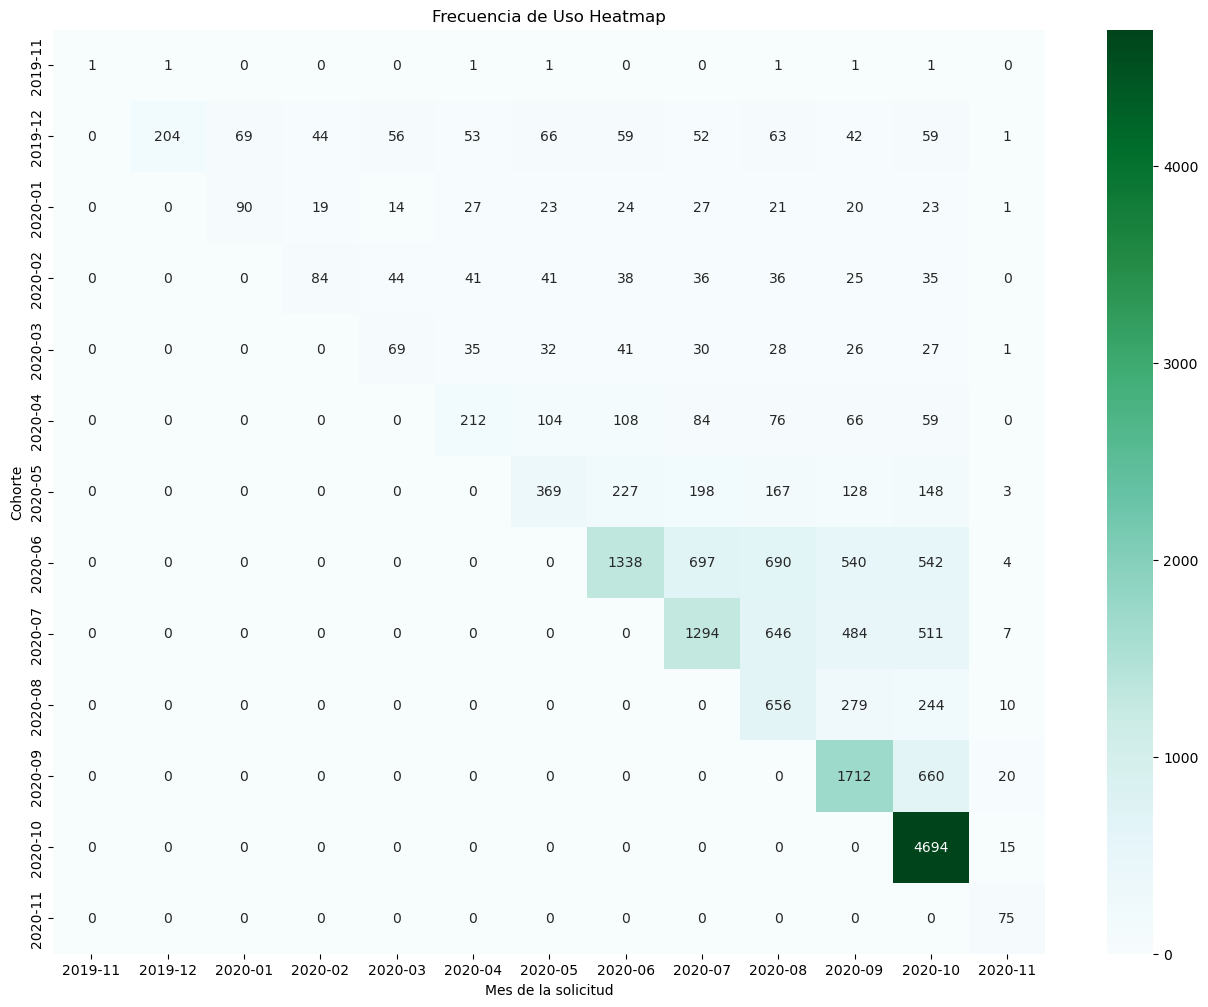

In [277]:
# Crear heatmap para visualizar la frecuencia de uso del servicio
plt.figure(figsize=(16,12))

use_frequency.index = use_frequency.index.strftime('%Y-%m')
use_frequency.columns = use_frequency.columns.strftime('%Y-%m')


sns.heatmap(use_frequency, annot=True, fmt='d', cmap='BuGn')
# Add title and axis labels
plt.title('Frecuencia de Uso Heatmap')
plt.xlabel('Mes de la solicitud')
plt.ylabel('Cohorte')

plt.show()

In [50]:
# Metrica 2 del analisis: Tasa de Incidentes
'''
Incidencias de pago:
- transaction_declined
- direct_debit_rejected
- canceled
'''

# Agrupar por cohortes y status para obtener el numero de user id por cada uno
cohort_status = cash_request.groupby(by=["cohorts", "status"])['user_id'].count()

#Resetear index para convertir a dataframe
cohort_status.reset_index()

,cohorts,status,user_id
0,2019-11-01,canceled,1
1,2019-11-01,money_back,6
2,2019-11-01,rejected,1
3,2019-12-01,direct_debit_rejected,39
4,2019-12-01,direct_debit_sent,2
...,...,...,...
61,2020-10-01,rejected,143
62,2020-10-01,transaction_declined,32
63,2020-11-01,direct_debit_rejected,3
64,2020-11-01,money_back,71


In [22]:

cohort_status_pivot = cash_request.pivot_table(
    values = "user_id",
    index = "status",
    aggfunc = "count",
    columns = "cohorts")
cohort_status_pivot.fillna(0)

cohorts,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01
status,,,,,,,,,,,,,
active,0.0,0.0,0.0,1.0,1.0,0.0,1.0,12.0,14.0,2.0,4.0,24.0,0.0
canceled,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0
direct_debit_rejected,0.0,39.0,11.0,8.0,4.0,34.0,38.0,119.0,132.0,44.0,120.0,263.0,3.0
direct_debit_sent,0.0,2.0,0.0,0.0,1.0,1.0,2.0,4.0,3.0,5.0,7.0,9.0,0.0
money_back,6.0,611.0,207.0,336.0,248.0,593.0,1096.0,3197.0,2230.0,831.0,1786.0,4471.0,71.0
rejected,1.0,240.0,103.0,77.0,69.0,212.0,312.0,1369.0,1349.0,627.0,718.0,143.0,1.0
transaction_declined,0.0,1.0,0.0,1.0,0.0,0.0,0.0,8.0,5.0,0.0,1.0,32.0,0.0


In [23]:
#Crear columna indicando si es incidente de pago o no
cash_request['incident'] = cash_request['status'].apply(lambda x: 'Incident' if x in ['transaction_declined', 'direct_debit_rejected', 'canceled'] else 'No Incident')
cash_request.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,year,month,date,cohorts,incident
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,...,regular,NaN,NaN,NaN,NaN,2019,12,2019-12-01,2019-12-01,No Incident
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,...,regular,NaN,NaN,NaN,NaN,2019,12,2019-12-01,2019-12-01,No Incident
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,...,regular,NaN,NaN,NaN,NaN,2019,12,2019-12-01,2019-12-01,No Incident
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,...,regular,NaN,NaN,NaN,NaN,2019,12,2019-12-01,2019-12-01,No Incident
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,...,regular,NaN,NaN,NaN,NaN,2020,5,2020-05-01,2020-05-01,No Incident


In [281]:
# Contar numero de incidencias por cohorte
incident = cash_request.groupby(by=["cohorts", "incident"])['user_id'].count()
incident

cohorts     incident   
2019-11-01  Incident          1
            No Incident       7
2019-12-01  Incident         40
            No Incident     853
2020-01-01  Incident         11
            No Incident     310
2020-02-01  Incident          9
            No Incident     414
2020-03-01  Incident          4
            No Incident     319
2020-04-01  Incident         34
            No Incident     806
2020-05-01  Incident         38
            No Incident    1411
2020-06-01  Incident        129
            No Incident    4582
2020-07-01  Incident        139
            No Incident    3596
2020-08-01  Incident         45
            No Incident    1465
2020-09-01  Incident        121
            No Incident    2515
2020-10-01  Incident        296
            No Incident    4647
2020-11-01  Incident          3
            No Incident      72
Name: user_id, dtype: int64

In [283]:
# Calcular el numero de incidencias y el ratio por cohorte
def incident_ratio(group):
    numero_incidencias = (group["incident"] == "Incident").sum()
    total_solicitudes = len(group)
    ratio_incidencias = numero_incidencias / total_solicitudes if total_solicitudes > 0 else 0
    
    return pd.Series({
        'numero_incidencias': numero_incidencias,
        'total_solicitudes': total_solicitudes,
        'ratio_incidencias': ratio_incidencias})
        
cohort_incident = cash_request.groupby('cohorts').apply(incident_ratio)

cohort_incident

/var/folders/ws/nnfflmsx4qs43903148tzjnc0000gn/T/ipykernel_11888/3891678159.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cohort_incident = cash_request.groupby('cohorts').apply(incident_ratio)


,numero_incidencias,total_solicitudes,ratio_incidencias
cohorts,,,
2019-11-01,1.0,8.0,0.125000
2019-12-01,40.0,893.0,0.044793
2020-01-01,11.0,321.0,0.034268
2020-02-01,9.0,423.0,0.021277
2020-03-01,4.0,323.0,0.012384
2020-04-01,34.0,840.0,0.040476
2020-05-01,38.0,1449.0,0.026225
2020-06-01,129.0,4711.0,0.027383
2020-07-01,139.0,3735.0,0.037216


/var/folders/ws/nnfflmsx4qs43903148tzjnc0000gn/T/ipykernel_11888/187439186.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cohort_incident_chart = cash_request.groupby('cohorts').apply(incident_ratio_chart)


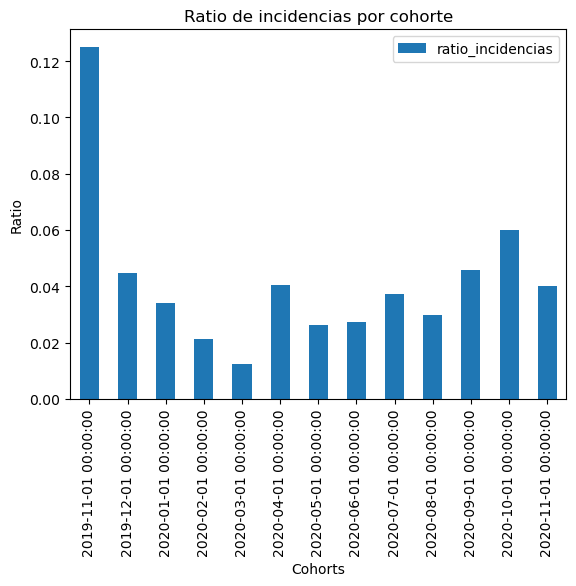

In [289]:
# Bar chart para ratio_incidencias x cohort
def incident_ratio_chart(group):
    numero_incidencias = (group["incident"] == "Incident").sum()
    total_solicitudes = len(group)
    ratio_incidencias = numero_incidencias / total_solicitudes if total_solicitudes > 0 else 0
    
    return pd.Series({
        'ratio_incidencias': ratio_incidencias})
        
cohort_incident_chart = cash_request.groupby('cohorts').apply(incident_ratio_chart)

cohort_incident_chart.plot(kind="bar")

# Añadir titulo
plt.title('Ratio de incidencias por cohorte')

# Labeling the x-axis
plt.xlabel('Cohorts')

# Labeling the y-axis
plt.ylabel('Ratio')

# Displaying the bar chart
plt.show()

In [158]:
# Metrica 3 del analisis: Ingresos Generados por la Cohorte
cohort_amount = cash_request[cash_request['status'] == 'money_back'].groupby("cohorts")['amount'].sum().reset_index()

cohort_amount = cohort_amount.set_index('cohorts')

cohort_amount


,amount
cohorts,
2019-11-01,131.0
2019-12-01,57932.0
2020-01-01,20086.0
2020-02-01,32132.0
2020-03-01,24940.0
2020-04-01,55962.0
2020-05-01,102877.0
2020-06-01,291764.0
2020-07-01,192995.0


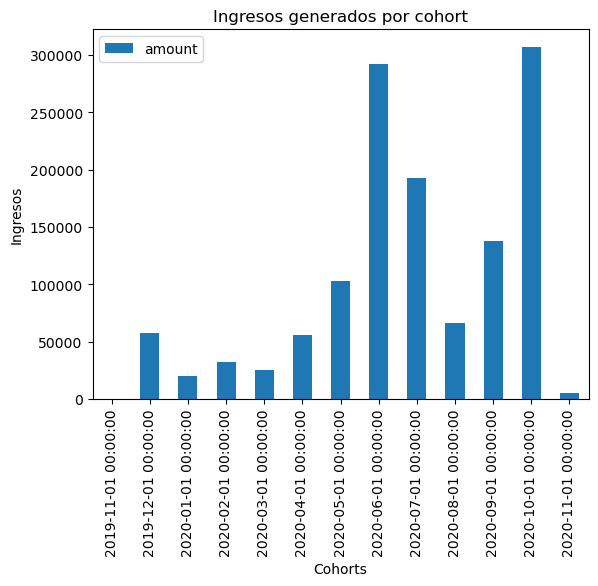

In [160]:
# Bar chart para ingresos generados x cohort
cohort_amount.plot(kind="bar")

# Añadir titulo
plt.title('Ingresos generados por cohort')

# Labeling the x-axis
plt.xlabel('Cohorts')

# Labeling the y-axis
plt.ylabel('Ingresos')

# Displaying the bar chart
plt.show()

In [168]:
# Metrica 4 del analisis: media de ingresos por usuario por cohorte (LTV)

# Agrupar por id_user y cohort para obtener el ingreso total de cada cliente en cada cohort
revenue_user = cash_request.groupby(['user_id', 'cohorts'])['amount'].sum().reset_index()

#Agrupar por cohort para obtener la media de los ingresos por cliente en cada cohort
cohort_avg = revenue_user.groupby('cohorts')['amount'].mean().reset_index()

cohort_avg = cohort_avg.set_index('cohorts')

cohort_avg

,amount
cohorts,
2019-11-01,232.000000
2019-12-01,415.593137
2020-01-01,345.600000
2020-02-01,473.535714
2020-03-01,457.318841
2020-04-01,373.792453
2020-05-01,364.926829
2020-06-01,318.035127
2020-07-01,247.972952


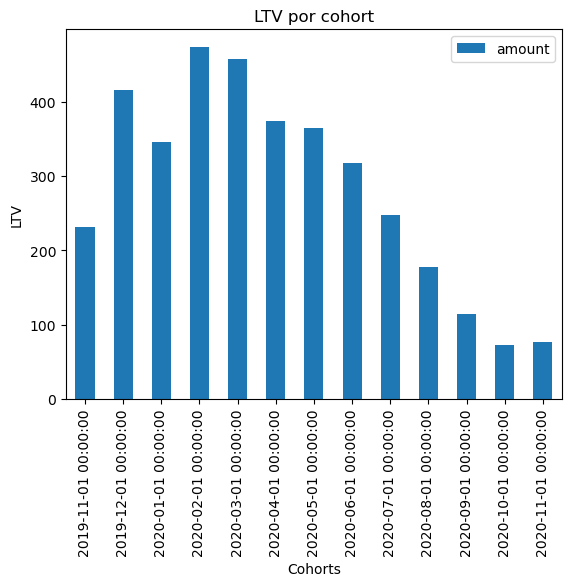

In [176]:
# Bar chart para ingresos generados x cohort (LTV)
cohort_avg.plot(kind="bar")

# Añadir titulo
plt.title('LTV por cohort')

# Labeling the x-axis
plt.xlabel('Cohorts')

# Labeling the y-axis
plt.ylabel('LTV')

# Displaying the bar chart
plt.show()